# AICP Intership Task Week 6


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.dates as mdates

### Reading CSV File

In [2]:
df = pd.read_csv('births.csv')
df.head(10)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


## Question no 1
Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.

### Answer

In [3]:
df['Decade'] = df['year'] // 10 * 10
df.head()

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


## Question No 2
Show the descriptive statistics of the data.
### Answer

In [4]:
df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
 5   Decade  15547 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 728.9+ KB


## Question No 3

Check if your data contains any missing values

### Answer

In [6]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

## Question No 4 
What is the trend of male & female births every decade?

### Answer

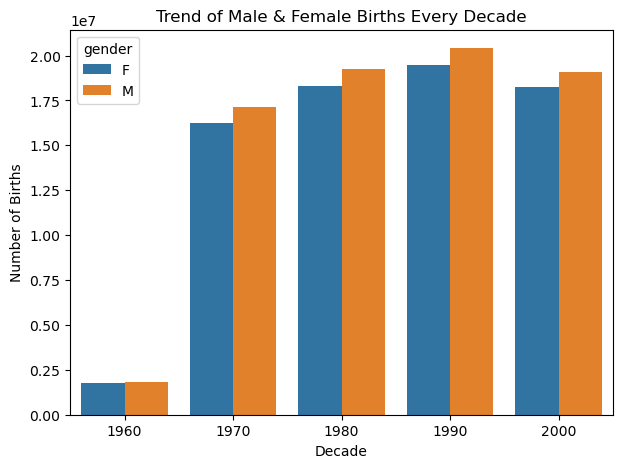

In [7]:
decade_births = df.groupby(['Decade', 'gender'])['births'].sum().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='Decade', y='births', hue='gender', data=decade_births)
plt.title('Trend of Male & Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.show()

# Question No 5
To remove outliers from dataset following techinque to include only those values that fall within 5
standard deviations from the mean.This is a common statistical technique used to focus on the central
tendency of the data while excluding extreme values.
Use this technique to remove outliers.
### Answer

In [8]:

mean = df['births'].mean()
std_dev = df['births'].std()

lower_bound = mean - 5 * std_dev
upper_bound = mean + 5 * std_dev

df = df[(df['births'] >= lower_bound) & (df['births'] <= upper_bound)]
df.head()

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


# Question No 6
Plot births by weekday for several decades. Write down your observation.
### Answer

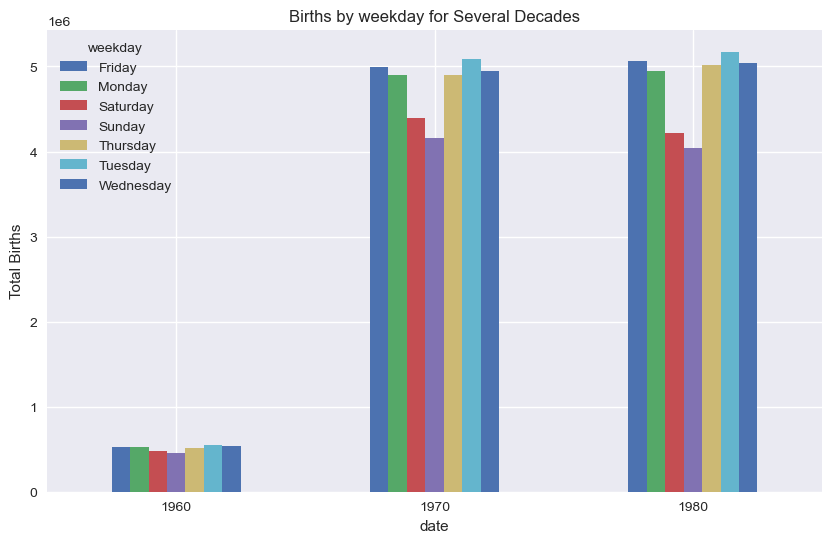

In [39]:
data = pd.read_csv("births.csv")
data = data[(data['day'] >= 1) & (data['day'] <= 31)]
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data['date_str'] = data['year'].astype(str) + '-' + data['month'].astype(str) + '-' + data['day'].astype(str)
data['date'] = pd.to_datetime(data['date_str'], errors='coerce')
data.dropna(subset=['date'], inplace=True)
data['weekday'] = data['date'].dt.day_name()
births_by_weekday = data.groupby([data['date'].dt.year // 10 * 10, 'weekday'])['births'].sum().unstack()

ax = births_by_weekday.plot(kind='bar', figsize=(10, 6))
plt.title('Births by weekday for Several Decades')
plt.ylabel('Total Births')
plt.xticks(rotation=0)
plt.show()


# Observation

1. There's a consistent pattern across decades with fewer births on weekends (Saturday and Sunday) compared to weekdays.
2. Tuesday tend to have relatively higher births, possibly attributed to scheduled inductions or cesarean deliveries.
3. The overall trend appears to be relatively stable across the decades, indicating a consistent distribution of births by weekday over time.
4. These observations provide insights into the distribution of births by weekday over several decades.

# Question No 7
Group the data by month and day separately

### Answer

In [11]:
grouped_by_month = df.groupby('month')['births'].sum()

grouped_by_day = df.groupby('day')['births'].sum()

print('\nbirths by months:\n')
print(grouped_by_month)
print('\nbirths by day:\n')
print(grouped_by_day)


births by months:

month
1     5759568
2     7582391
3     5868651
4     5712231
5     5785602
6     5759233
7     6220777
8     6310276
9     6206785
10    6056193
11    6149799
12    5905087
Name: births, dtype: int64

births by day:

day
1.0     2286854
2.0     2303168
3.0     2309087
4.0     2286588
5.0     2296951
6.0     2308073
7.0     2314081
8.0     2322376
9.0     2315055
10.0    2327197
11.0    2319561
12.0    2322956
13.0    2290896
14.0    2335551
15.0    2333426
16.0    2332456
17.0    2335458
18.0    2334949
19.0    2331183
20.0    2337631
21.0    2329563
22.0    2317711
23.0    2305174
24.0    2290500
25.0    2283975
26.0    2300208
27.0    2314088
28.0    2328630
29.0    2189278
30.0    2141788
31.0    1342126
99.0       6403
Name: births, dtype: int64


# Question No 8
 Focusing on the month and day only, you have a time series reflecting the average number of
births by date of the year. From this, plot the data.
### Answer

C:\Users\PMLS\AppData\Local\Temp\ipykernel_9808\4147962444.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(10957.0, 11322.0)

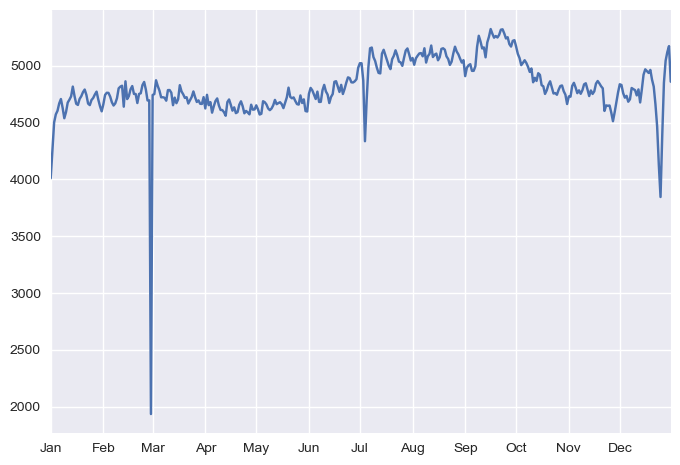

In [12]:
dailyMean = df.groupby(['month','day'])['births'].mean().reset_index()

dr = pd.date_range('01-01-2020', '12-31-2020', freq='D')
realdates = pd.Series(tuple(zip(dr.month, dr.day)))
dfdates = pd.Series(tuple(zip(dailyMean['month'], dailyMean['day'].astype(int))))
dailyMean = dailyMean[dfdates.isin(realdates)]
dates = pd.to_datetime(dict(year=2000, month=dailyMean['month'], day=dailyMean['day']))

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, dailyMean['births'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xlim(dates.iloc[0], dates.iloc[-1])